In [17]:
import pandas as pd
import stylia
import numpy as np

# Load the data
df = pd.read_csv('../results/results_pairs/chemical_gene_pairs_prediction_output_focus_with_variant_aggregates_top50_filter_llm_top10.csv')

In [11]:
genes = sorted(df['gene'].unique())
chemicals = sorted(df['chemical'].unique())
cap2chem = dict((c.capitalize(), c) for c in chemicals)
chemicals = sorted([c.capitalize() for c in chemicals])

In [13]:
chemicals = list(df["chemical"].unique())
cap2chem = dict((c.capitalize(), c) for c in chemicals)
chemicals = sorted([c.capitalize() for c in chemicals])

In [34]:
R = []
for gene in genes:
    row = []
    for chemical in chemicals:
        try:
            row.append(df[(df['gene'] == gene) & (df['chemical'] == cap2chem[chemical])]['consensus_zscore'].values[0])
        except:
            row.append(0)
    R.append(row)

R = np.clip(np.array(R).T, 0, 5)

In [46]:
import scipy.cluster.hierarchy as sch

def cluster_data(X, colnames, rownames):
    row_clusters = sch.linkage(X, method='ward')
    row_dendrogram = sch.dendrogram(row_clusters, no_plot=True)
    row_order = row_dendrogram['leaves']

    col_clusters = sch.linkage(X.T, method='ward')
    col_dendrogram = sch.dendrogram(col_clusters, no_plot=True)
    col_order = col_dendrogram['leaves']

    X_clustered = X[np.ix_(row_order, col_order)]
    colnames_clustered = [colnames[i] for i in col_order]
    rownames_clustered = [rownames[i] for i in row_order]

    return X_clustered, colnames_clustered, rownames_clustered

R_clustered, genes_clustered, chemicals_clustered = cluster_data(R, genes, chemicals)


<Axes: title={'center': 'Plot title'}>

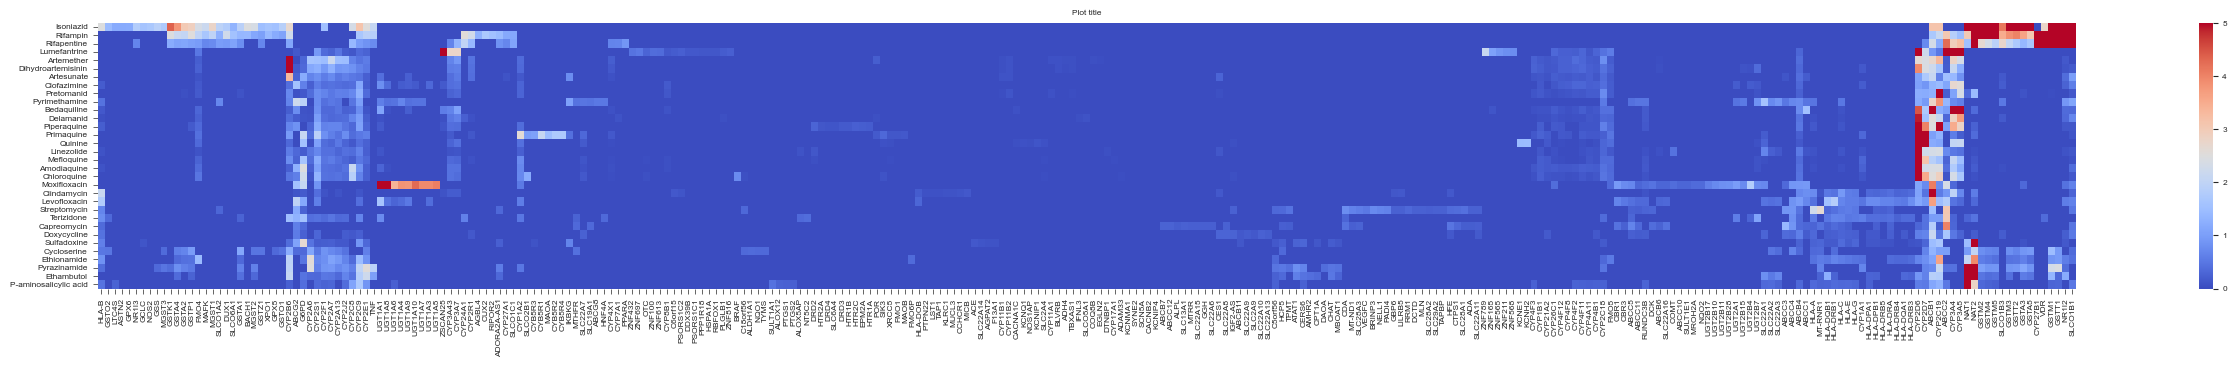

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = stylia.create_figure(1, 1, width=stylia.TWO_COLUMNS_WIDTH*4.5)
ax = axs.next()
sns.heatmap(R_clustered, cmap='coolwarm', xticklabels=genes_clustered, yticklabels=chemicals_clustered, ax=ax)


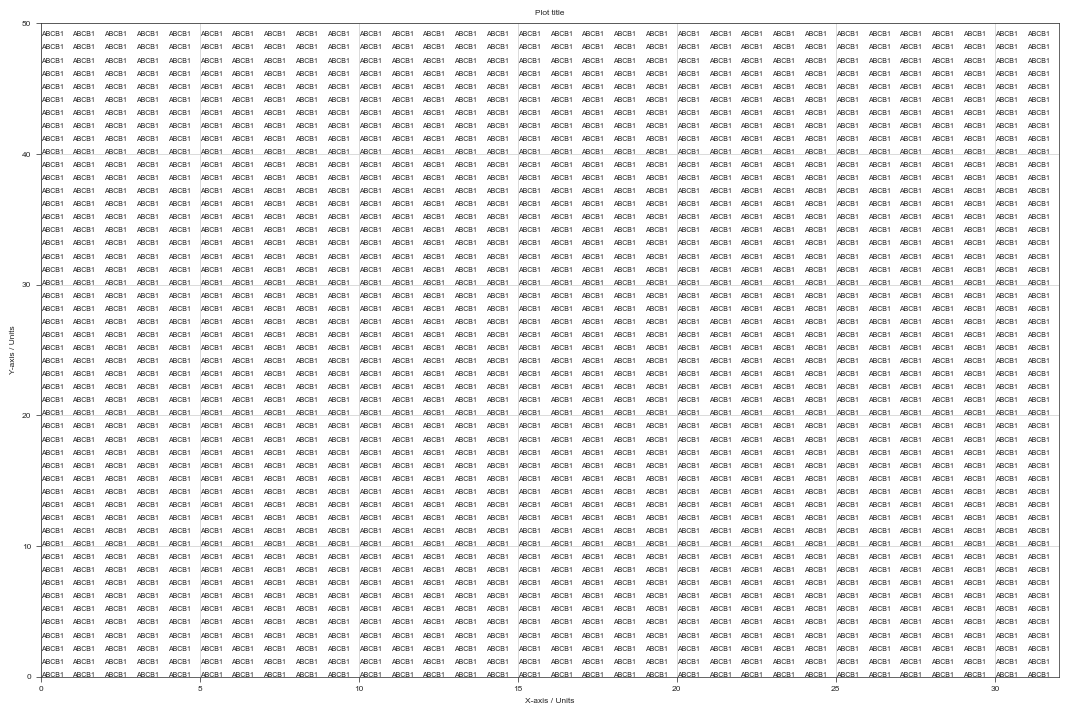

In [66]:
def chemical_top50_plot(ax, df):
    for i in range(50):
        for j in range(32):
            ax.text(j,i, "ABCB1")
    ax.set_xlim(0,32)
    ax.set_ylim(0,50)



fig, axs = stylia.create_figure(1, 1, width=stylia.TWO_COLUMNS_WIDTH*1.5, height=stylia.TWO_COLUMNS_WIDTH*1)
ax = axs.next()
chemical_top50_plot(ax, df)

stylia.save_figure("shape_test.png")
